In [40]:
import pandas as pd

df = pd.read_csv('Sentiment.csv')
df.head()

created_at             tweet_id  \
0  2020-11-20T17:45:55.000Z  1329843429992501251   
1  2020-11-20T17:59:58.000Z  1329846965769809926   
2  2020-11-20T17:28:13.000Z  1329838975645790211   
3  2020-11-20T17:28:25.000Z  1329839025948127232   
4  2020-11-20T17:28:37.000Z  1329839076300623874   

                                               tweet  today_date  \
0                        @NICKIMINAJ ABOUT TO STREAM  2020-11-20   
1                             hello dear @NICKIMINAJ  2020-11-20   
2  RT @bts_bighit: #BTS 'Life Goes On' (ARMY ver....  2020-11-20   
3    Freaky Girls @theestallion @sza Issa big vibe 🔥  2020-11-20   
4  When you feeling like a diva, who do you call?...  2020-11-20   

  present_hashtags present_mentions  positive  negative  neutral  compound  \
0              NaN       nickiminaj     0.000     0.000    1.000    0.0000   
1              NaN       nickiminaj     0.722     0.000    0.278    0.3818   
2              bts              NaN     0.000     0.000    1.000    0.0000   
3              NaN              sza     0.000     0.385    0.615   -0.3612   
4       nickiminaj              NaN     0.286     0.000    0.714    0.4588   

   positive_sentiment  neutral_sentiment  negative_sentiment  
0                 NaN                0.0                 NaN  
1                 1.0                NaN                 NaN  
2                 NaN                0.0                 NaN  
3                 NaN                NaN                -1.0  
4                 1.0                NaN                 NaN

In [41]:
import numpy as np
df_positive = pd.read_csv('Sentiment.csv')

df_positive = df_positive[(df_positive["positive_sentiment"]==1.0)]

df_positive['combine'] = df_positive[['present_hashtags', 'present_mentions']].apply(lambda x: ', '.join(x[x.notnull()]), axis = 1)


prob_mention = df_positive['combine'].value_counts(ascending=False,normalize=False).to_csv('positive_count.csv')

# prob_hashtag = df_positive['present_hashtags'].value_counts(ascending=False,normalize=False).to_csv('positive_count.csv')


In [42]:
df_neutral = pd.read_csv('Sentiment.csv')

df_neutral = df_neutral[(df_neutral["neutral_sentiment"]==0.0)]


df_neutral['combine'] = df_neutral[['present_hashtags', 'present_mentions']].apply(lambda x: ', '.join(x[x.notnull()]), axis = 1)
prob_mention_neutral = df_neutral['combine'].value_counts(ascending=False,normalize=False).to_csv('neutral_count.csv')



In [43]:
df_negative = pd.read_csv('Sentiment.csv')

df_negative = df_negative[(df_negative["negative_sentiment"]==-1.0)]

df_negative['combine'] = df_negative[['present_hashtags', 'present_mentions']].apply(lambda x: ', '.join(x[x.notnull()]), axis = 1)
prob_mention_negative = df_negative['combine'].value_counts(ascending=False,normalize=False).to_csv('negative_count.csv')



In [66]:
df_positive_cnt = pd.read_csv('positive_count.csv')
df_neutral_cnt = pd.read_csv('neutral_count.csv')
df_negative_cnt = pd.read_csv('negative_count.csv')
df_negative_cnt.head()

hashtag  negative
0    dynamite      1535
1         bts      1116
2         sza       673
3  liluzivert       469
4     dualipa       370

In [50]:
df_temp = pd.merge(df_positive_cnt, df_neutral_cnt, on='hashtag', how='outer')
df_combined = pd.merge(df_temp, df_negative_cnt, on='hashtag', how='outer')
df_combined.head()

hashtag  positive  neutral  negative
0           bts   21036.0  12941.0    1116.0
1      dynamite   17200.0    151.0    1535.0
2   shawnmendes    4143.0   2092.0     279.0
3       dualipa    2633.0    712.0     370.0
4  justinbieber    2011.0   1008.0     190.0

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]),
 <a list of 128 Text major ticklabel objects>)

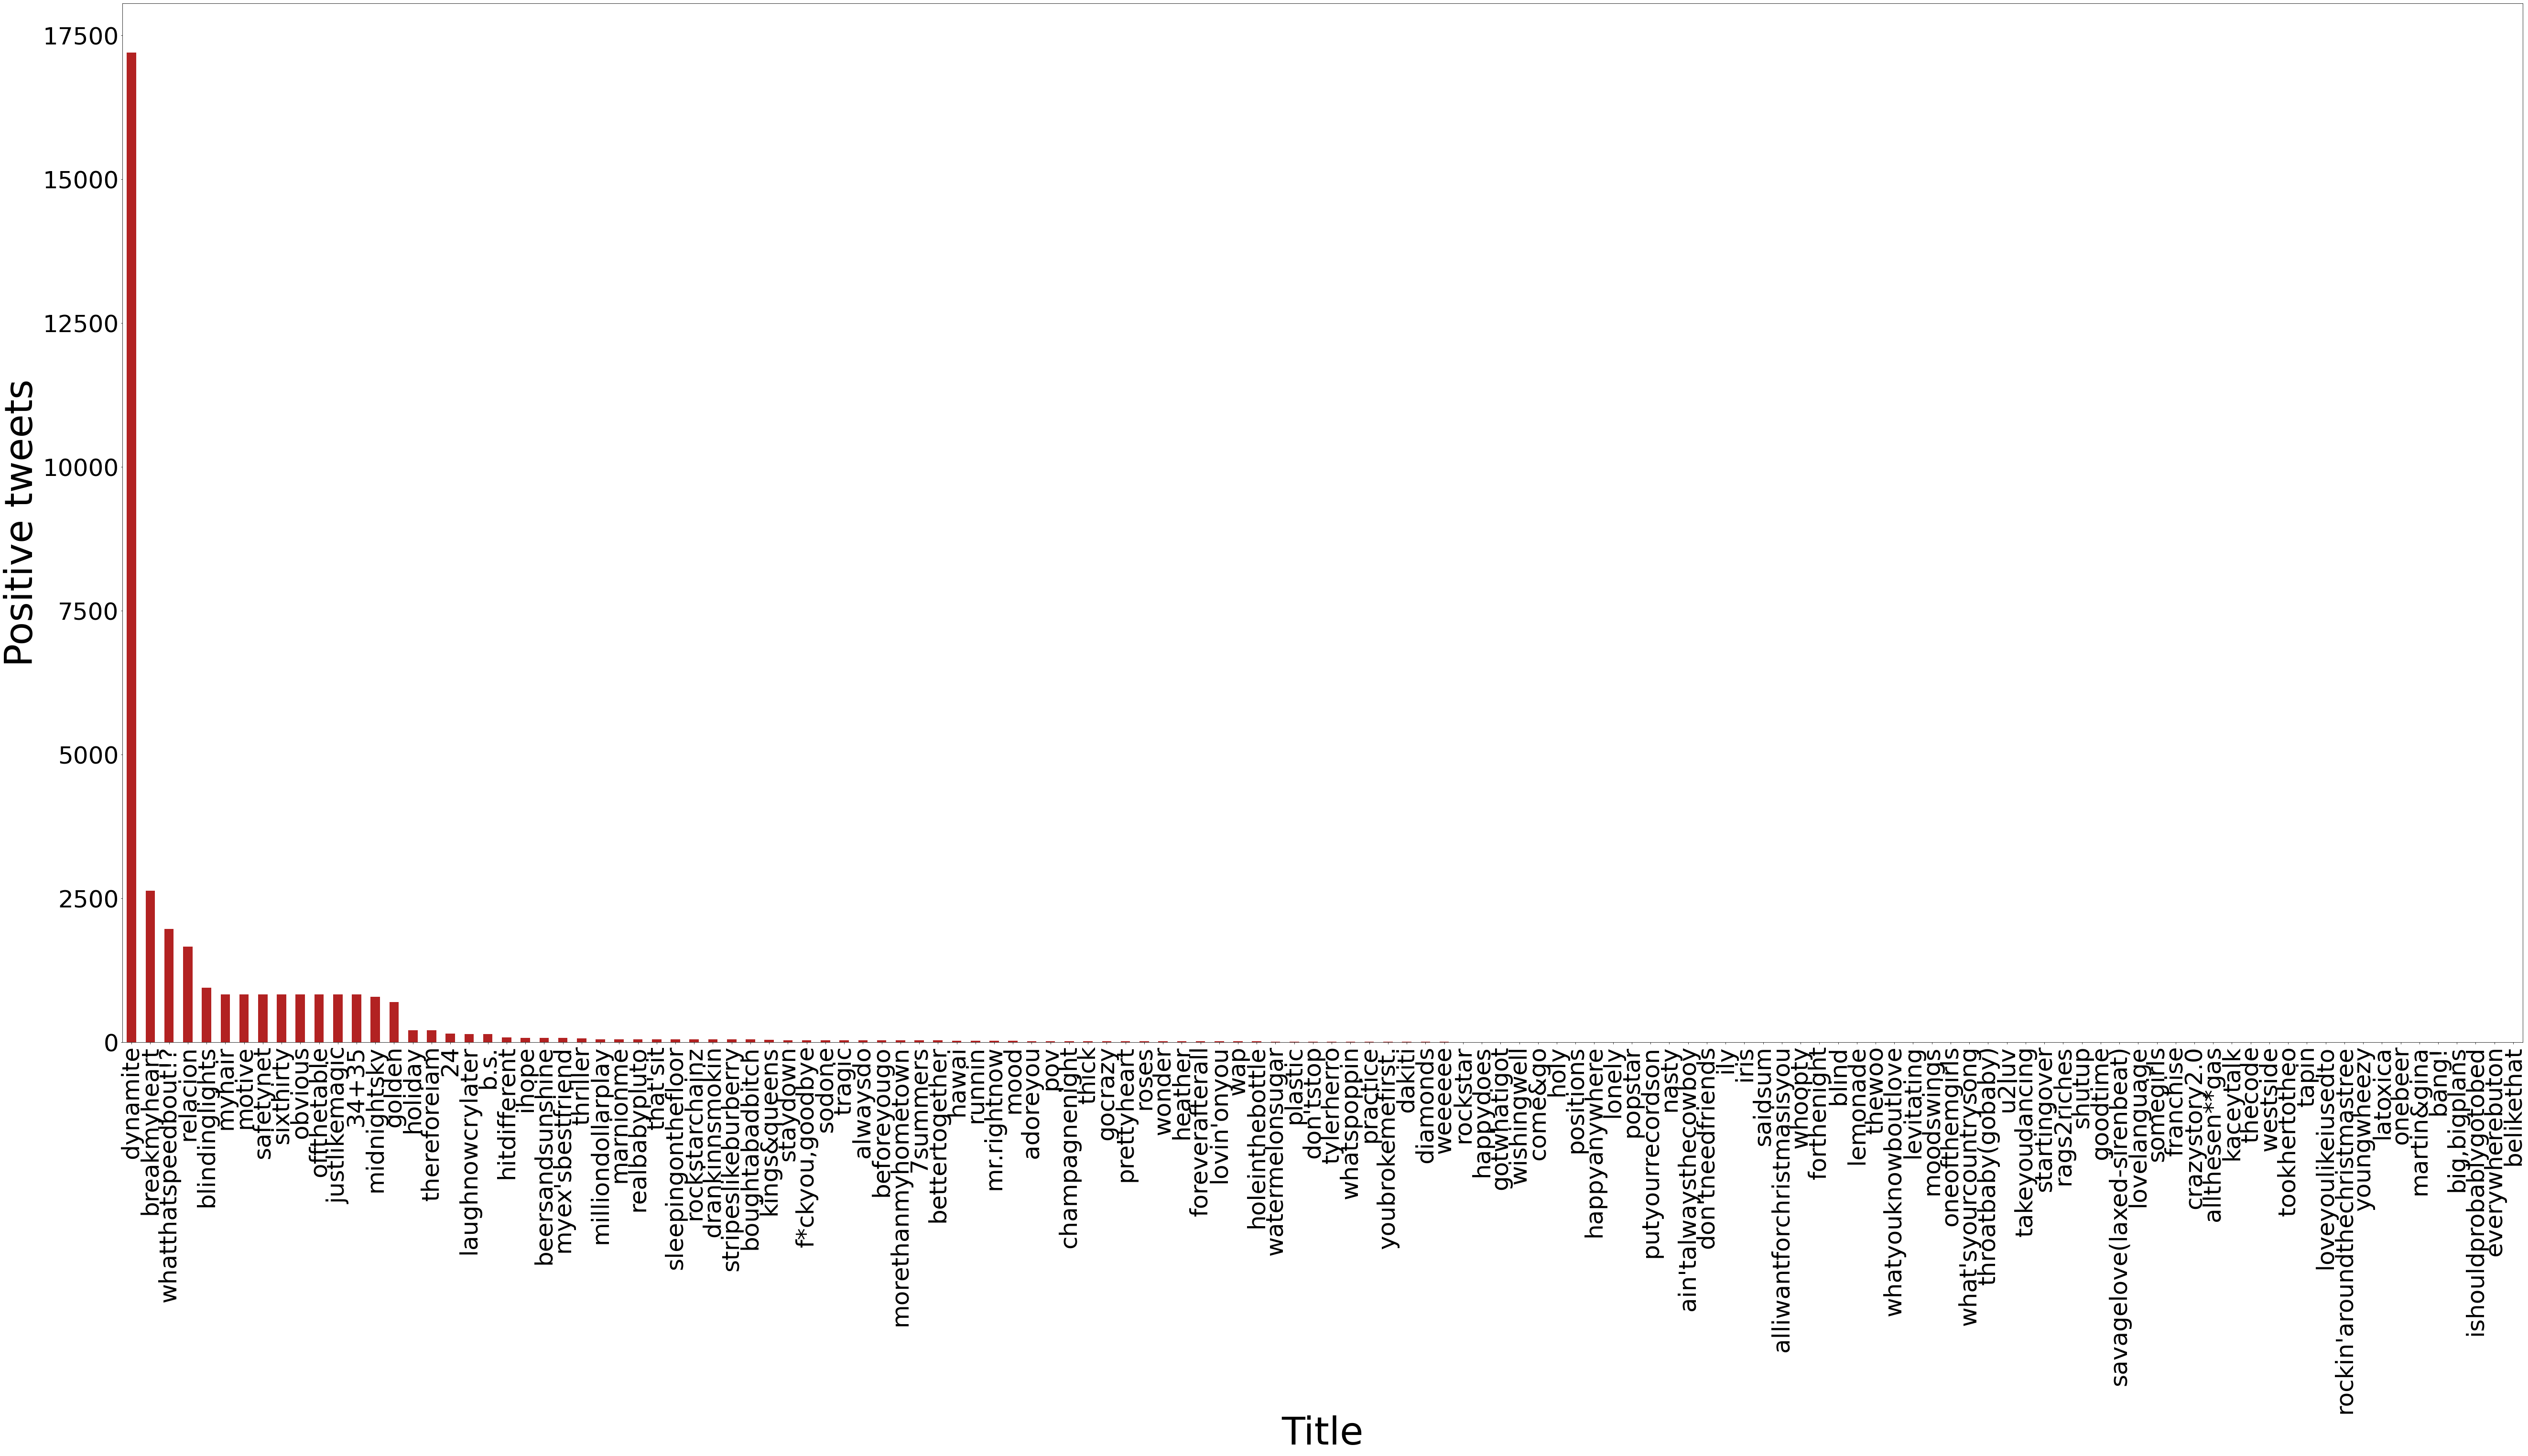

In [100]:
import pandas as pd

df_billboard = pd.read_csv('Billboard.csv')
for index,row in df_billboard.iterrows():
    df_billboard.at[index,'A'] = df_billboard.at[index,'A'].lower()
    df_billboard.at[index,'A'] = df_billboard.at[index,'A'].replace(' ','')
    df_billboard.at[index,'A'] = df_billboard.at[index,'A'].strip()
    df_billboard.at[index,'B'] = df_billboard.at[index,'B'].lower()
    df_billboard.at[index,'B'] = df_billboard.at[index,'B'].replace(' ','')
    df_billboard.at[index,'A'] = df_billboard.at[index,'A'].strip()
    

df_billboard['combine'] = df_billboard[['A', 'B']].apply(lambda x: ', '.join(x[x.notnull()]), axis = 1)

df_billboard = df_billboard.drop_duplicates(subset='combine', keep="first")

d_pos = {}
for index,row in df_positive_cnt.iterrows():
    pos_text = df_positive_cnt.at[index,'hashtag']
    pos_count = df_positive_cnt.at[index,'positive']
#     print(hash_count)
    d_pos[pos_text] = pos_count


df_billboard["combine_pos_cnt"] = 0
for index,row in df_billboard.iterrows():
    combine = df_billboard.at[index,'combine']
    my_list = combine.split(",")
    sum = 0
    for i in my_list:
        i = i.strip()
        if(i in d_pos and sum==0):
            sum += d_pos[i]
        else:
            sum += 0
#     print(i)
#     print(sum)
    df_billboard.at[index,'combine_pos_cnt'] = sum
final_pos_df = df_billboard.sort_values(by=['combine_pos_cnt'], ascending=False)
# final_pos_df.head()

com_pos = final_pos_df[['A','combine', 'combine_pos_cnt']].copy()
com_pos.to_csv ('com_pos.csv', index = False, header=True)

com_pos.plot(x ='A', y='combine_pos_cnt', kind = 'bar',legend=None,figsize=(90,40),fontsize=50,color='firebrick')
plt.xlabel('Title', fontsize=80)
plt.ylabel('Positive tweets', fontsize=80)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]),
 <a list of 128 Text major ticklabel objects>)

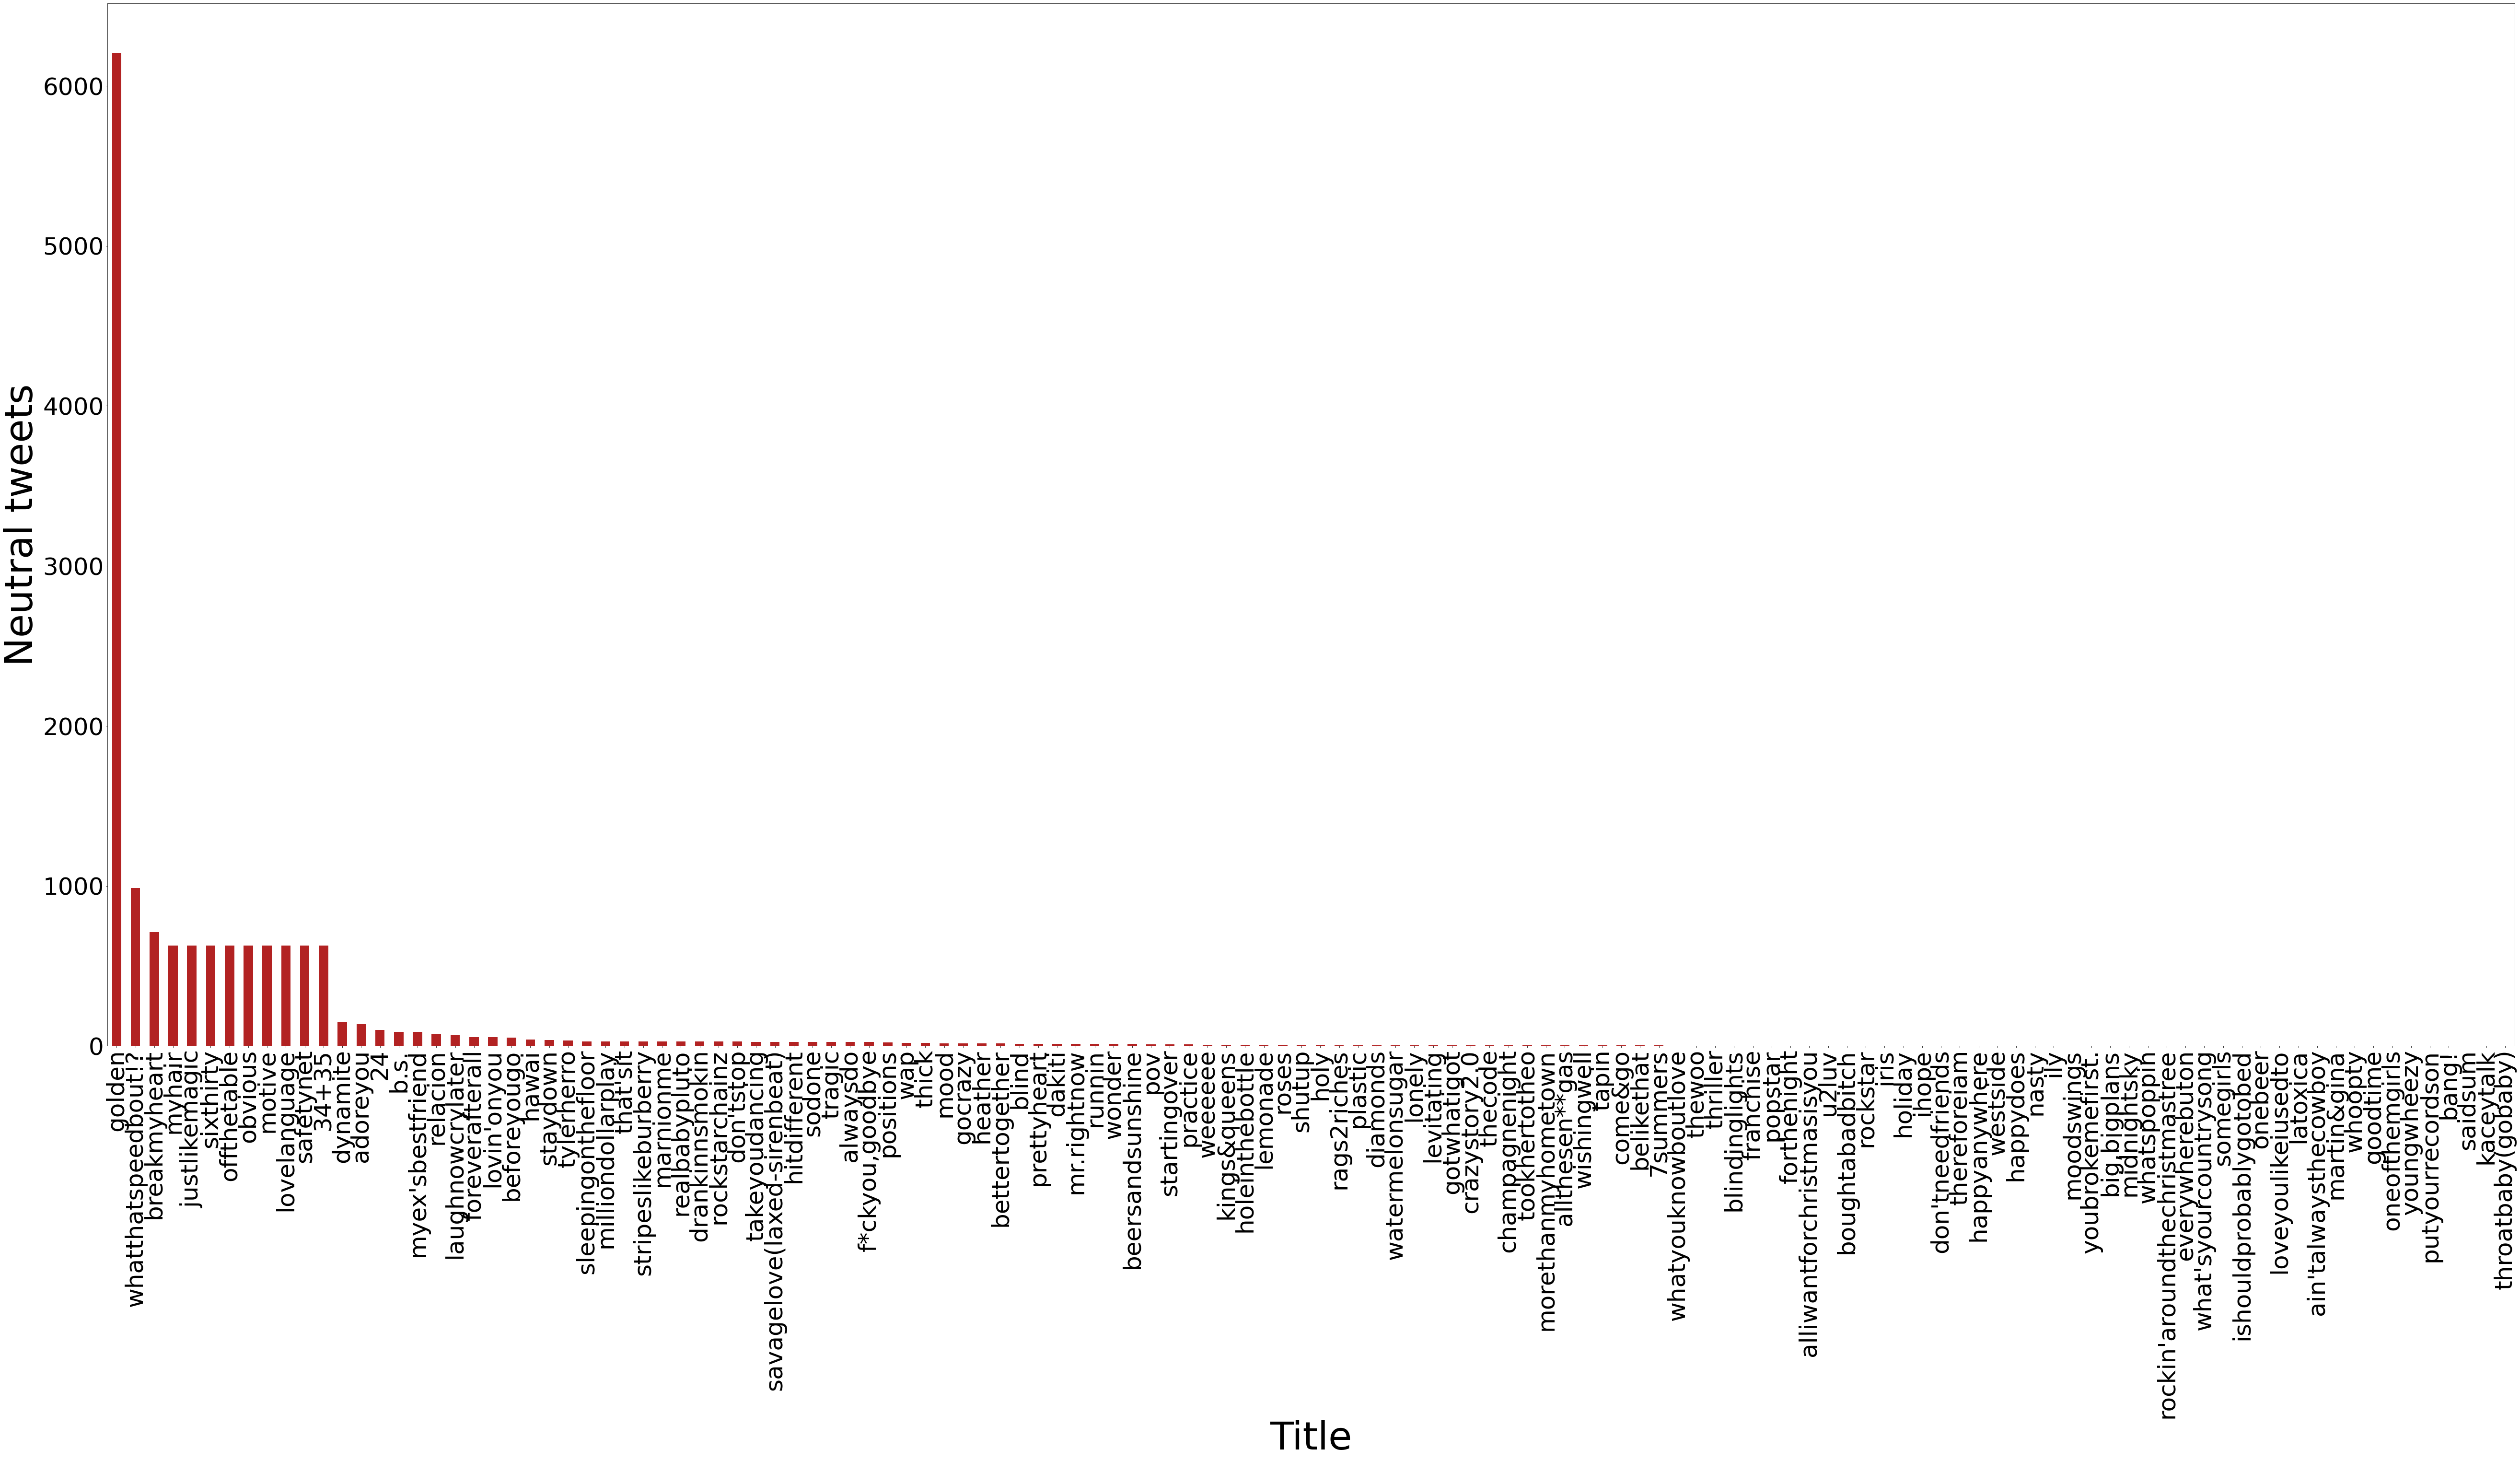

In [99]:
import pandas as pd

df_billboard = pd.read_csv('Billboard.csv')
for index,row in df_billboard.iterrows():
    df_billboard.at[index,'A'] = df_billboard.at[index,'A'].lower()
    df_billboard.at[index,'A'] = df_billboard.at[index,'A'].replace(' ','')
    df_billboard.at[index,'A'] = df_billboard.at[index,'A'].strip()
    df_billboard.at[index,'B'] = df_billboard.at[index,'B'].lower()
    df_billboard.at[index,'B'] = df_billboard.at[index,'B'].replace(' ','')
    df_billboard.at[index,'A'] = df_billboard.at[index,'A'].strip()
    

df_billboard['combine'] = df_billboard[['A', 'B']].apply(lambda x: ', '.join(x[x.notnull()]), axis = 1)

df_billboard = df_billboard.drop_duplicates(subset='combine', keep="first")

d_neu = {}
for index,row in df_neutral_cnt.iterrows():
    neu_text = df_neutral_cnt.at[index,'hashtag']
    neu_count = df_neutral_cnt.at[index,'neutral']
#     print(hash_count)
    d_neu[neu_text] = neu_count


df_billboard["combine_neu_cnt"] = 0
for index,row in df_billboard.iterrows():
    combine = df_billboard.at[index,'combine']
    my_list = combine.split(",")
    sum = 0
    for i in my_list:
        i = i.strip()
        if(i in d_neu and sum==0):
            sum += d_neu[i]
        else:
            sum += 0
#     print(i)
#     print(sum)
    df_billboard.at[index,'combine_neu_cnt'] = sum
final_neu_df = df_billboard.sort_values(by=['combine_neu_cnt'], ascending=False)
final_neu_df.head()

com_neu = final_neu_df[['A','combine', 'combine_neu_cnt']].copy()
com_neu.to_csv ('com_neu.csv', index = False, header=True)

com_neu.plot(x ='A', y='combine_neu_cnt', kind = 'bar',legend=None,figsize=(90,40),fontsize=50,color='firebrick')
plt.xlabel('Title', fontsize=80)
plt.ylabel('Neutral tweets', fontsize=80)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]),
 <a list of 128 Text major ticklabel objects>)

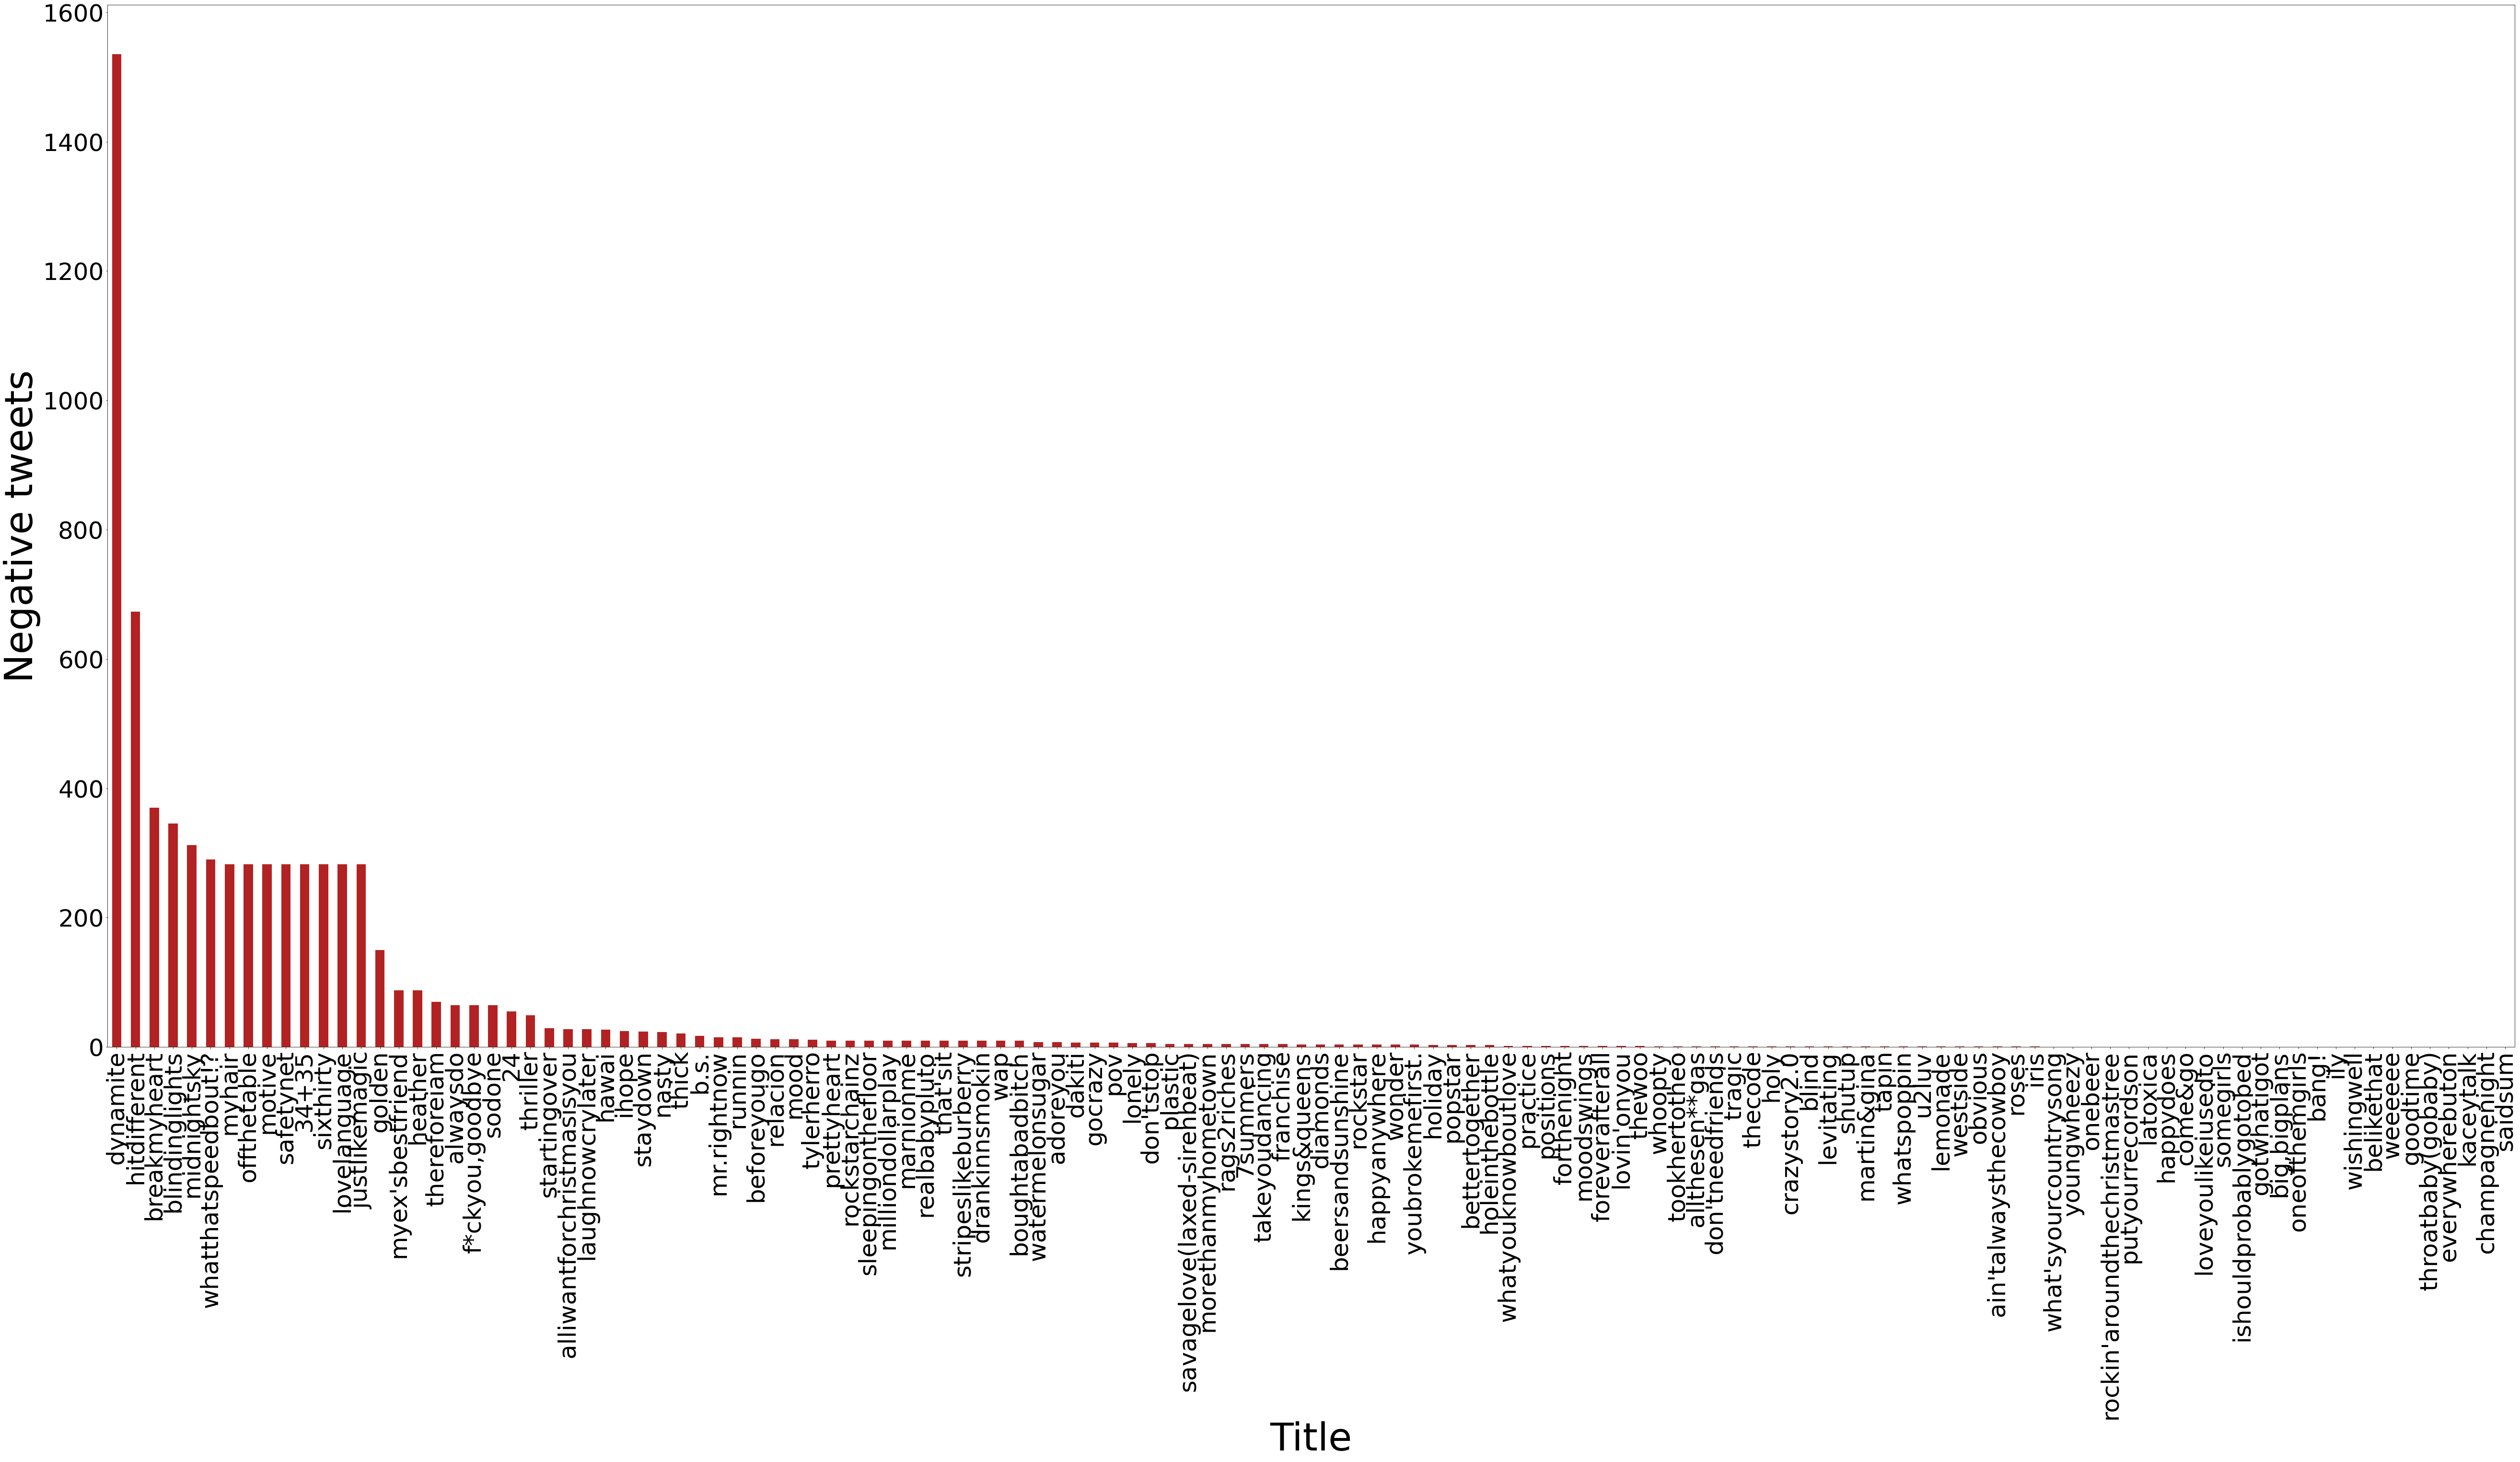

In [101]:
import pandas as pd

df_billboard = pd.read_csv('Billboard.csv')
for index,row in df_billboard.iterrows():
    df_billboard.at[index,'A'] = df_billboard.at[index,'A'].lower()
    df_billboard.at[index,'A'] = df_billboard.at[index,'A'].replace(' ','')
    df_billboard.at[index,'A'] = df_billboard.at[index,'A'].strip()
    df_billboard.at[index,'B'] = df_billboard.at[index,'B'].lower()
    df_billboard.at[index,'B'] = df_billboard.at[index,'B'].replace(' ','')
    df_billboard.at[index,'A'] = df_billboard.at[index,'A'].strip()
    

df_billboard['combine'] = df_billboard[['A', 'B']].apply(lambda x: ', '.join(x[x.notnull()]), axis = 1)

df_billboard = df_billboard.drop_duplicates(subset='combine', keep="first")

d_neg = {}
for index,row in df_negative_cnt.iterrows():
    neg_text = df_negative_cnt.at[index,'hashtag']
    neg_count = df_negative_cnt.at[index,'negative']
#     print(hash_count)
    d_neg[neg_text] = neg_count


df_billboard["combine_neg_cnt"] = 0
for index,row in df_billboard.iterrows():
    combine = df_billboard.at[index,'combine']
    my_list = combine.split(",")
    sum = 0
    for i in my_list:
        i = i.strip()
        if(i in d_neg and sum==0):
            sum += d_neg[i]
        else:
            sum += 0
#     print(i)
#     print(sum)
    df_billboard.at[index,'combine_neg_cnt'] = sum
final_neg_df = df_billboard.sort_values(by=['combine_neg_cnt'], ascending=False)
final_neg_df.head()

com_neg = final_neg_df[['A','combine', 'combine_neg_cnt']].copy()
com_neg.to_csv ('com_neg.csv', index = False, header=True)

com_neg.plot(x ='A', y='combine_neg_cnt', kind = 'bar',legend=None,figsize=(90,40),fontsize=50,color='firebrick')
plt.xlabel('Title', fontsize=80)
plt.ylabel('Negative tweets', fontsize=80)
plt.xticks(rotation=90)

In [83]:
df_tem = pd.merge(com_pos, com_neu, on='combine', how='outer')
df_combi = pd.merge(df_tem, com_neg, on='combine', how='outer')

comdf = df_combi[['A_x','combine','combine_pos_cnt','combine_neu_cnt','combine_neg_cnt']].copy()
comdf.head()

A_x                                            combine  \
0             dynamite                                      dynamite, bts   
1         breakmyheart                              breakmyheart, dualipa   
2  whatthatspeedbout!?  whatthatspeedbout!?, mikewillmade-it,nickimina...   
3             relacion  relacion, sech,daddyyankee,jbalvin,rosalia,far...   
4       blindinglights                          blindinglights, theweeknd   

   combine_pos_cnt  combine_neu_cnt  combine_neg_cnt  
0            17200              151             1535  
1             2633              712              370  
2             1971              986              290  
3             1667               73               12  
4              947                2              346

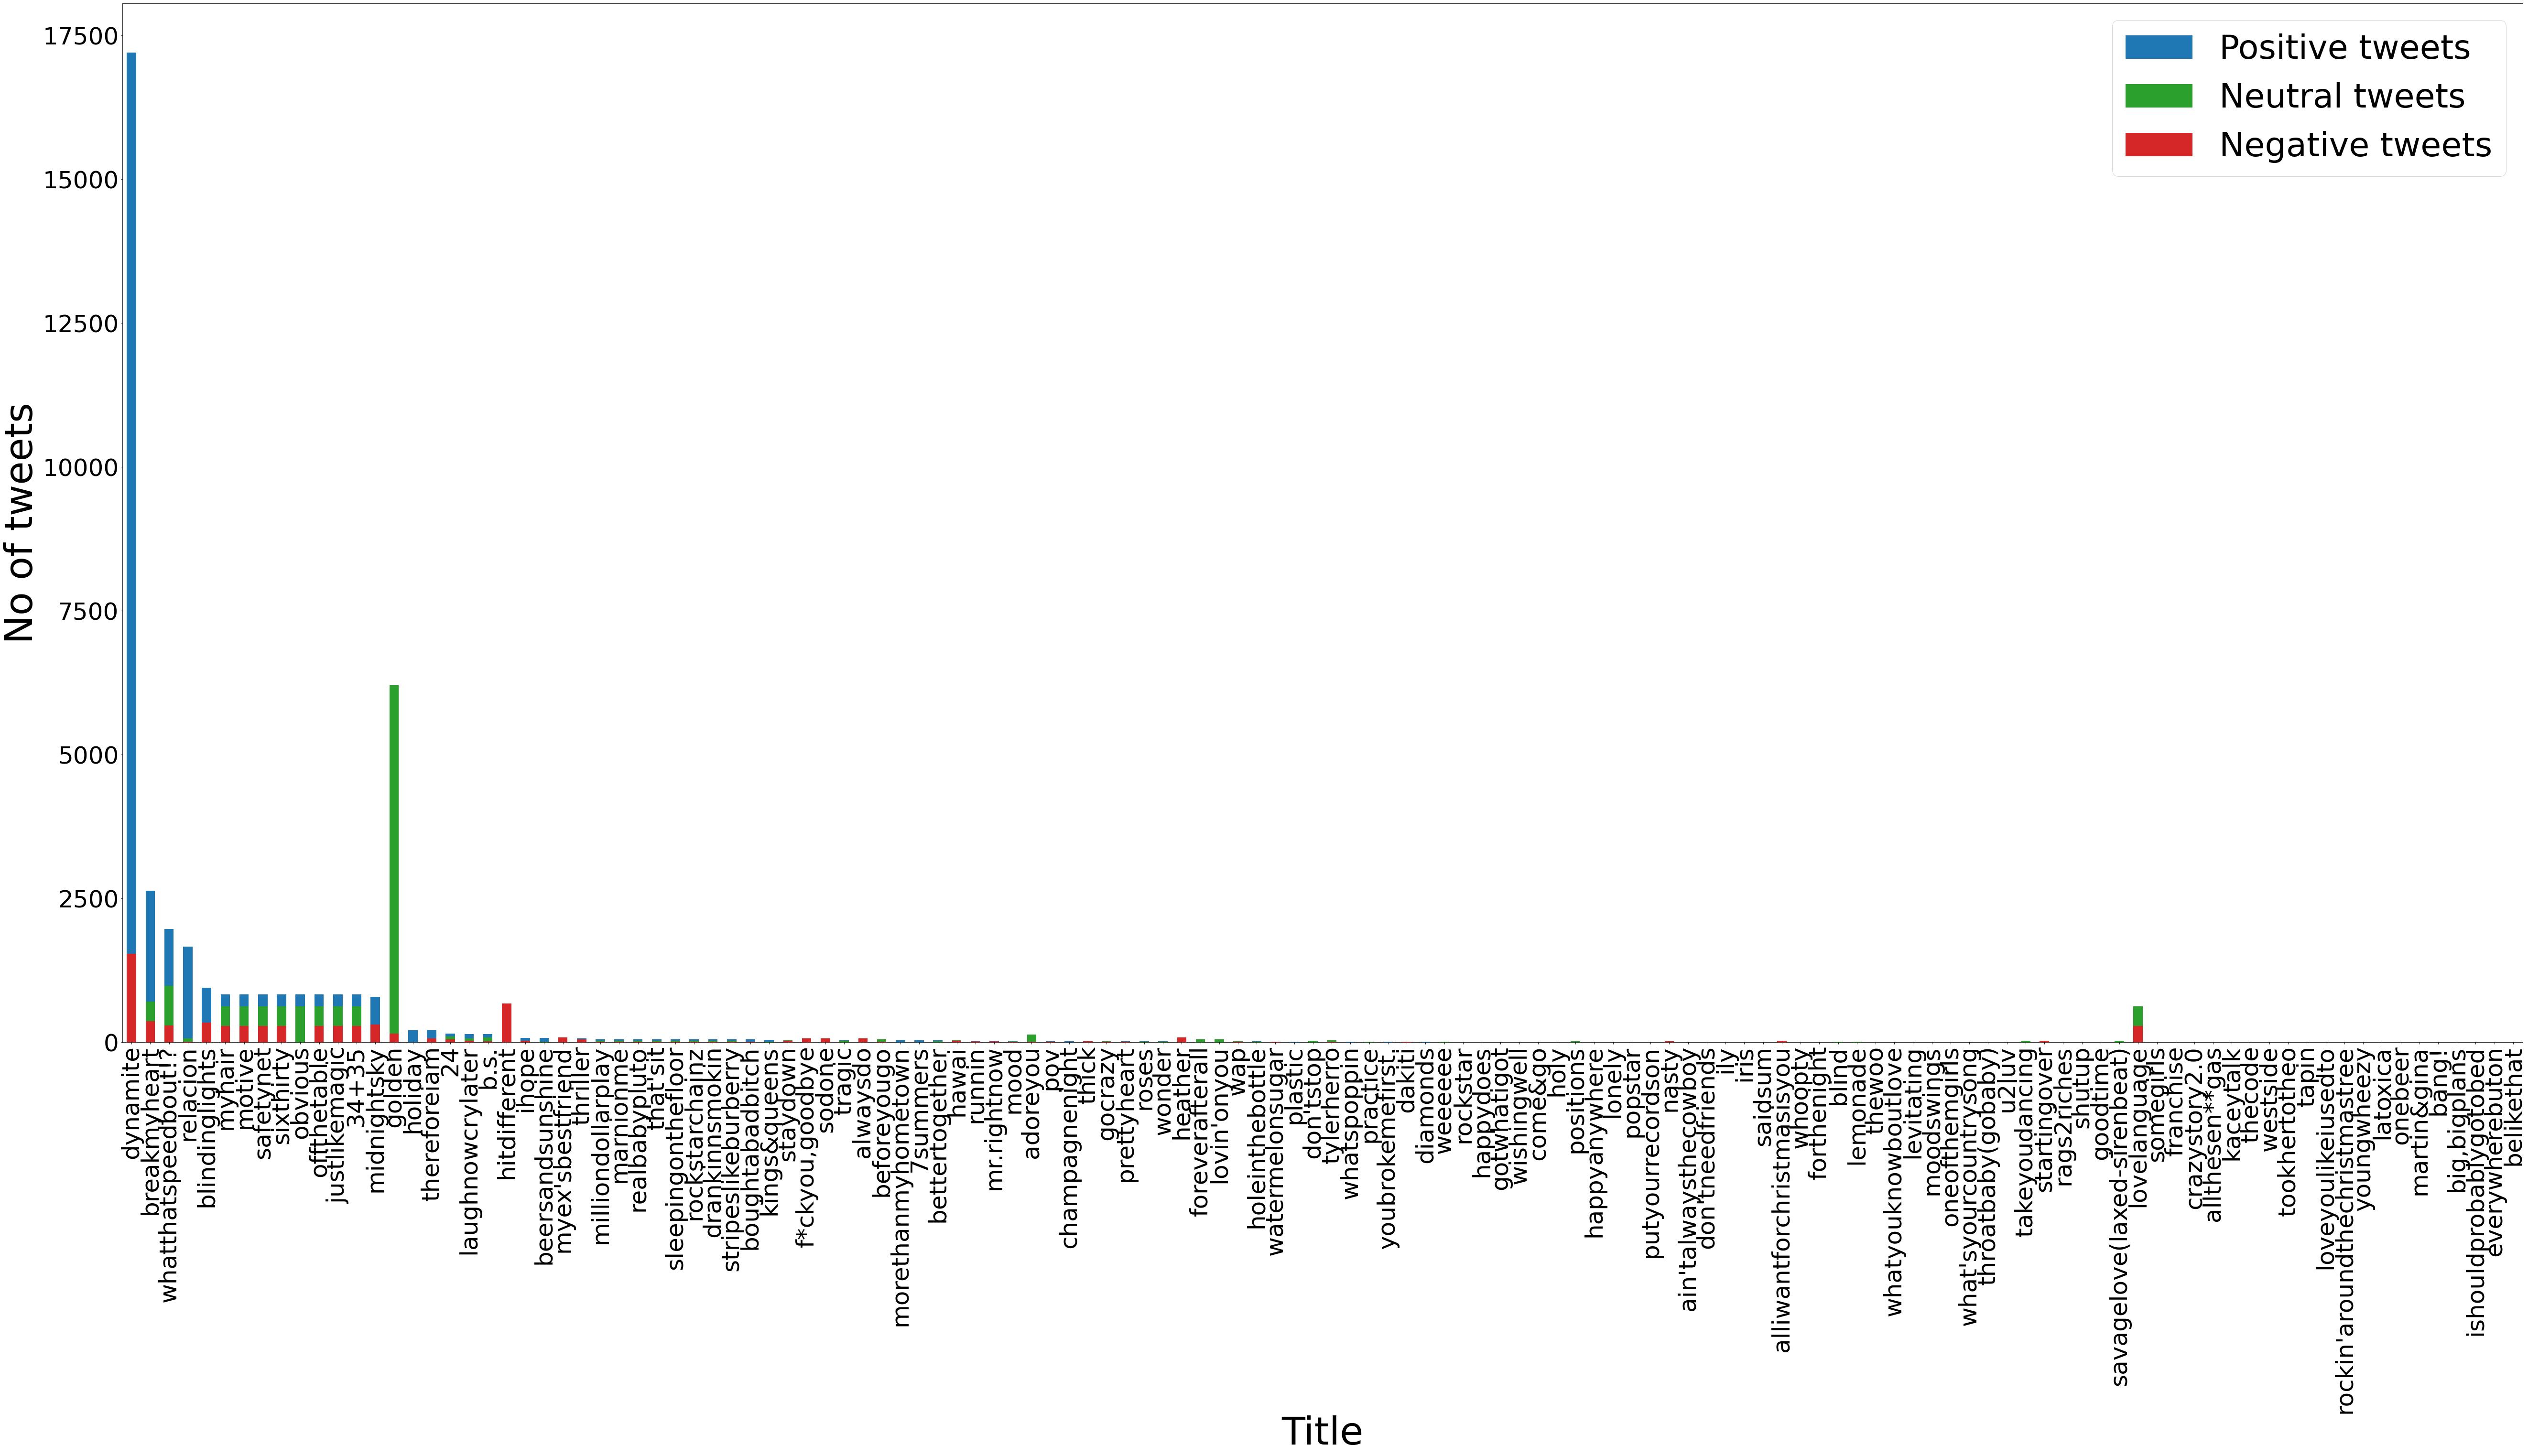

In [96]:

import matplotlib.pyplot as plt

ax = comdf.plot(x="A_x", y="combine_pos_cnt", kind="bar",figsize=(90,40),fontsize=50)
comdf.plot(x="A_x", y="combine_neu_cnt", kind="bar", ax=ax, color="C2")
comdf.plot(x="A_x", y="combine_neg_cnt", kind="bar", ax=ax, color="C3")
plt.xlabel('Title', fontsize=80)
plt.ylabel('No of tweets', fontsize=80)
plt.legend(prop={'size': 70},labels={'Negative tweets','Neutral tweets','Positive tweets'})
plt.show()

In [85]:
comdf.to_csv ('comdf.csv', index = False, header=True)


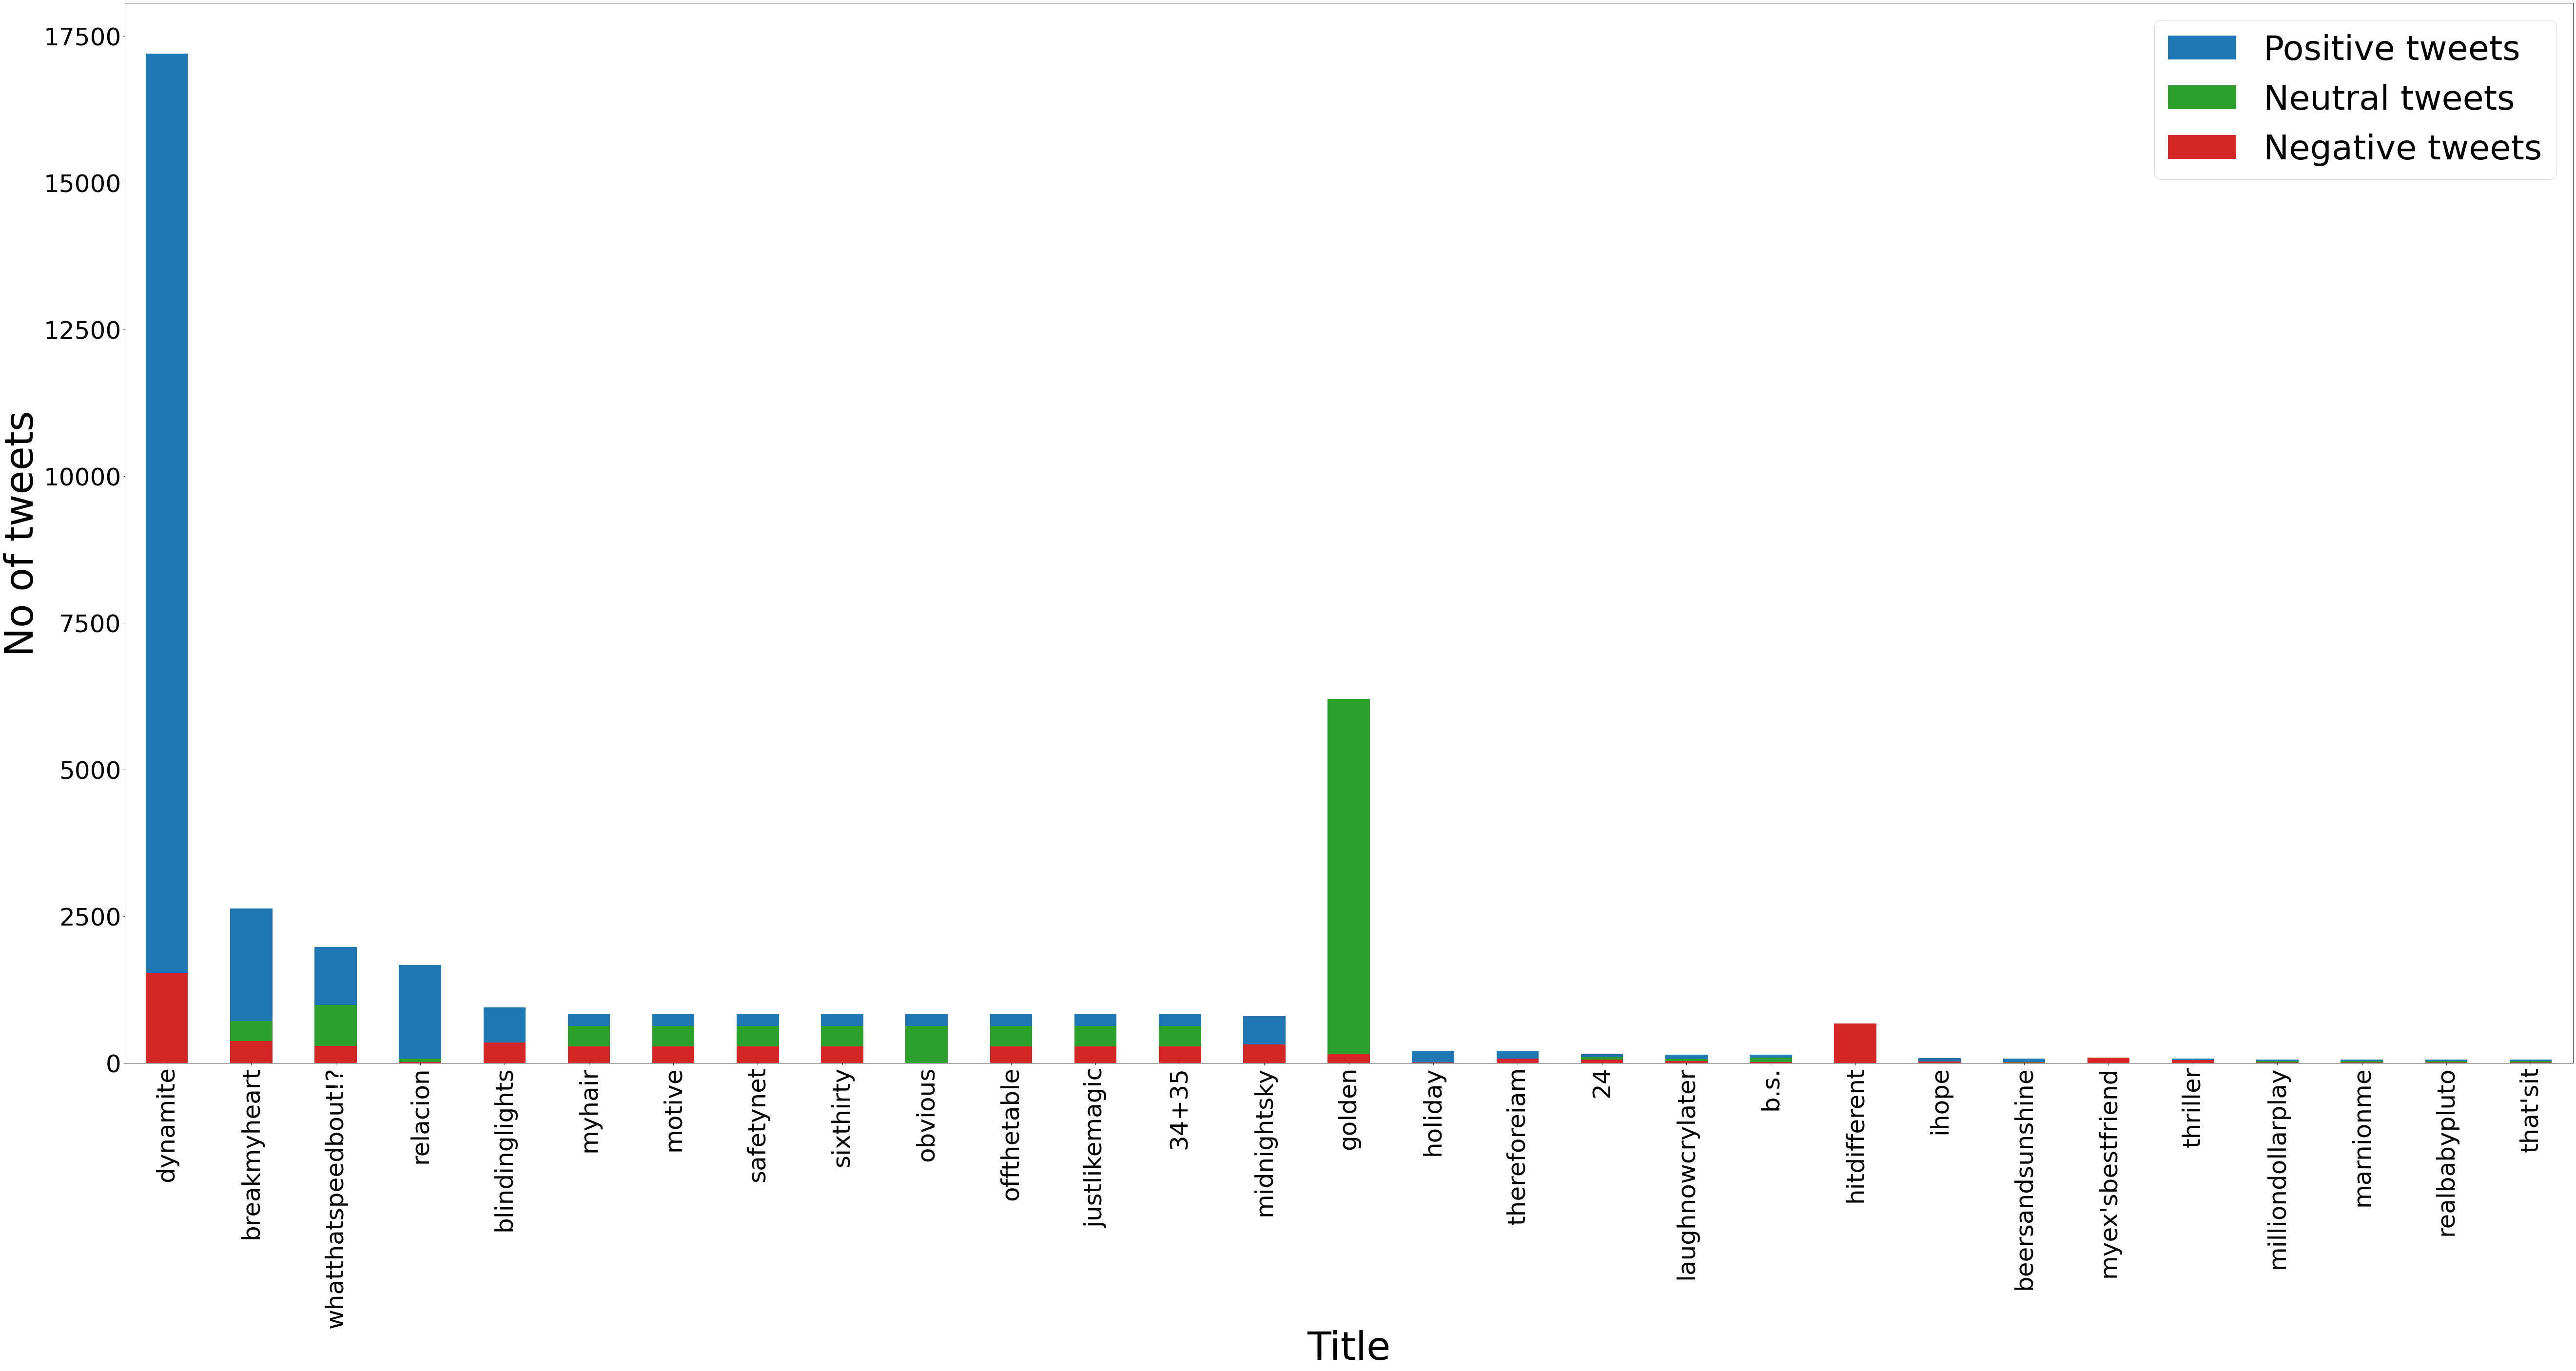

In [95]:
comdf_part = pd.read_csv('comdf.csv')

import matplotlib.pyplot as plt

ax = comdf_part.plot(x="A_x", y="combine_pos_cnt", kind="bar",figsize=(90,40),fontsize=50)
comdf_part.plot(x="A_x", y="combine_neu_cnt", kind="bar", ax=ax, color="C2")
comdf_part.plot(x="A_x", y="combine_neg_cnt", kind="bar", ax=ax, color="C3")
plt.xlabel('Title', fontsize=80)
plt.ylabel('No of tweets', fontsize=80)
plt.legend(prop={'size': 70},labels={'Negative tweets','Neutral tweets','Positive tweets'})


plt.show()